In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from matplotlib import rcParams
sns.set(style="darkgrid")

rcParams['figure.figsize'] = 12,6
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [3]:
from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing(as_frame=True)
df = california_housing.frame
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [4]:
df.sample(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
7406,2.5966,32.0,3.671053,0.991776,2361.0,3.883224,33.96,-118.22,1.70900
13105,5.1811,6.0,9.431884,1.347826,1168.0,3.385507,38.42,-121.36,1.88400
16292,2.8750,37.0,4.400749,0.973783,951.0,3.561798,37.96,-121.24,0.57700
18448,5.3157,16.0,6.590551,1.106299,850.0,3.346457,37.23,-121.81,2.53300
18058,8.8178,27.0,7.472036,1.008949,1220.0,2.729306,37.27,-122.01,5.00001


# ) Finding missing/null values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [6]:
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [7]:
df.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

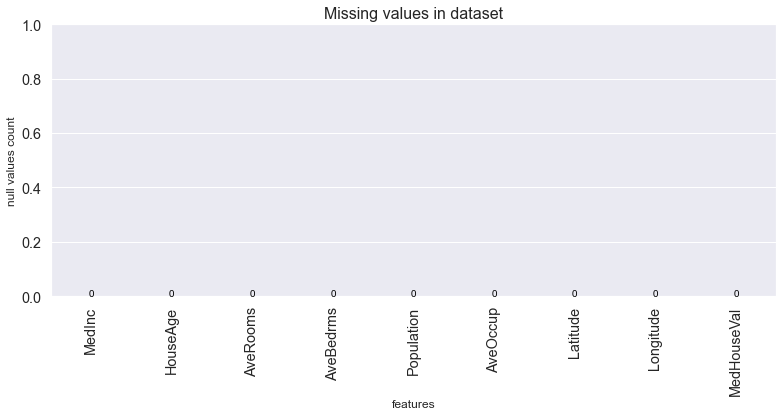

In [8]:
null_df = df.isnull().sum().reset_index()
plt.figure(figsize=(13,5))
ax = sns.barplot(null_df["index"], null_df[0], palette="husl")
ax.set(xlabel="features", ylabel="null values count")
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
ax.set_ylim(0,1)
[ax.text(index,value[1],value[1], color='black', ha="center") for index,value in enumerate(null_df.values)]
ax.set_title('Missing values in dataset', fontsize=16)
plt.show()

**Conclusion** : The data doesn't contain nan or null number. All columns have 20640 rows.

# ) Finding outliers

In [9]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

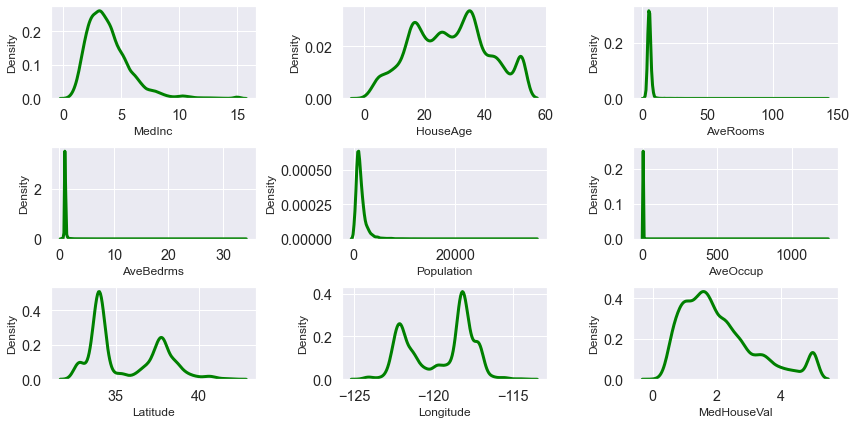

In [10]:
plt.figure(figsize=(12, 6))
for i in range(0, len(df.columns)):
    plt.subplot(3, int(len(df.columns)/3), i+1)
    sns.kdeplot(x=df[df.columns[i]], color='green')
    plt.xlabel(df.columns[i])
    plt.tight_layout()

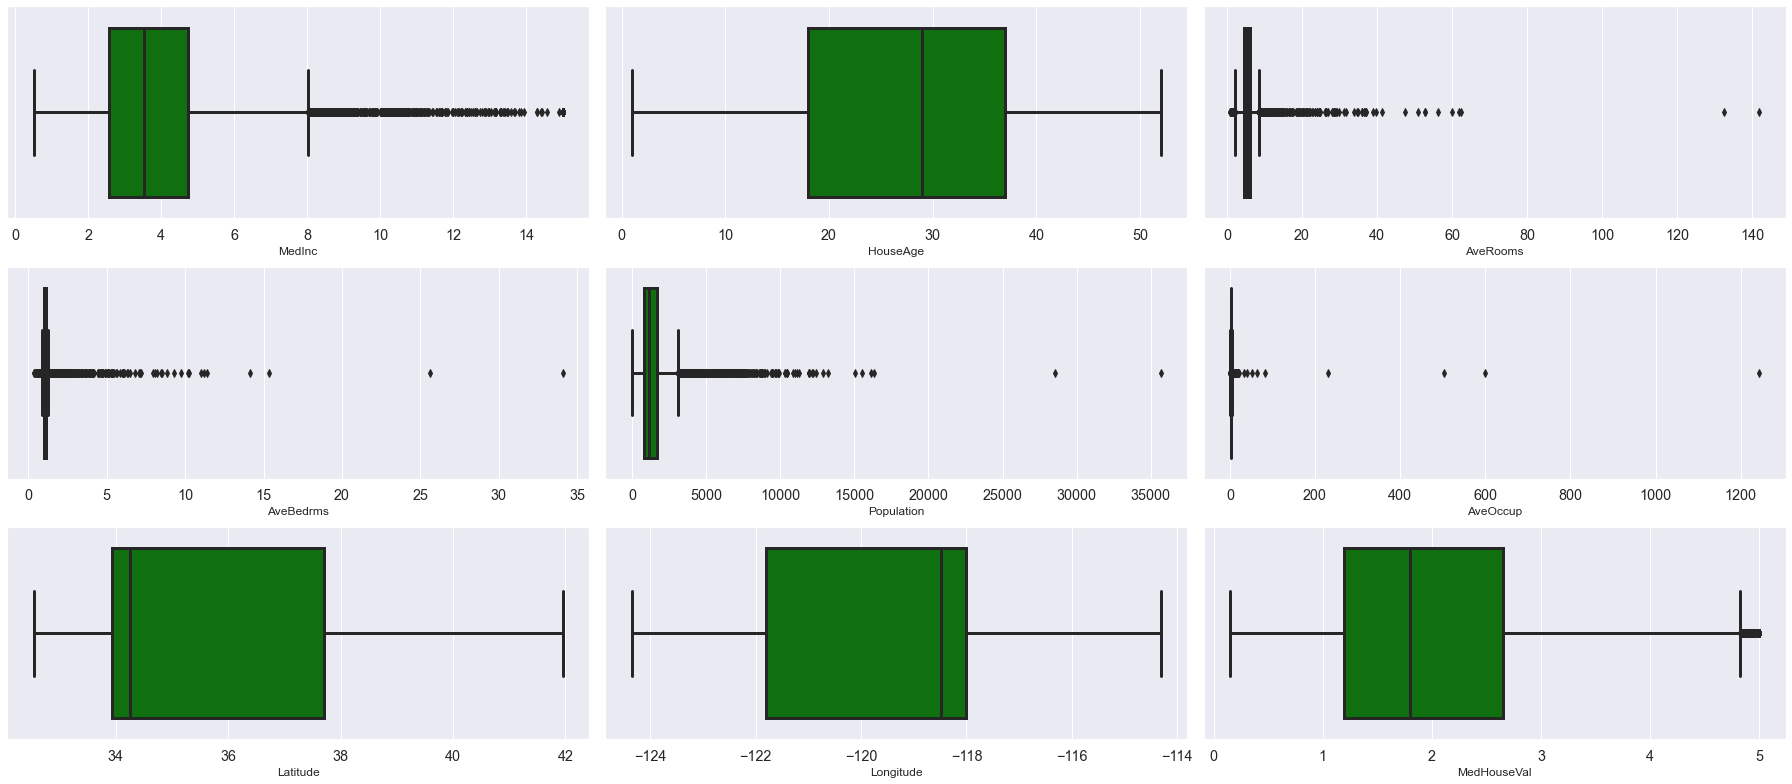

In [11]:
plt.figure(figsize=(25,11))
for i in range(0, len(df.columns)):
    plt.subplot(3, int(len(df.columns)/3), i+1)
    sns.boxplot(x=df[df.columns[i]], color='green')
    plt.xlabel(df.columns[i])
    plt.tight_layout()

In [12]:
for i in df.columns:
    skew_score = round(df[i].skew(),2)
    print(f"Column {i} has skew score {skew_score}")

Column MedInc has skew score 1.65
Column HouseAge has skew score 0.06
Column AveRooms has skew score 20.7
Column AveBedrms has skew score 31.32
Column Population has skew score 4.94
Column AveOccup has skew score 97.64
Column Latitude has skew score 0.47
Column Longitude has skew score -0.3
Column MedHouseVal has skew score 0.98


**Summarize**: The columns didn't have normal distribution and in boxplot we see many outliers, especially in MedInc, AveRooms, AceBedrms, Popoulation and AveOccup

**Detection Using IQR rule**

In [13]:
from scipy.stats import iqr

In [14]:
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3-Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

In [15]:
tot_out_iqr = []
for i in df.columns:
    lowerbound,upperbound = outlier_treatment(df[i])
    tot_out = df[(df[i]<lowerbound)|(df[i]>upperbound)][i].count()
    tot_out_iqr.append(tot_out)
out_iqr_tab = pd.DataFrame(list(zip(df.columns,tot_out_iqr)),columns=['columns','outlier_count'])
out_iqr_tab = out_iqr_tab.sort_values('outlier_count',ascending=False)

Text(0.5, 1.0, 'Counting Outliers Using 1.5*IQR')

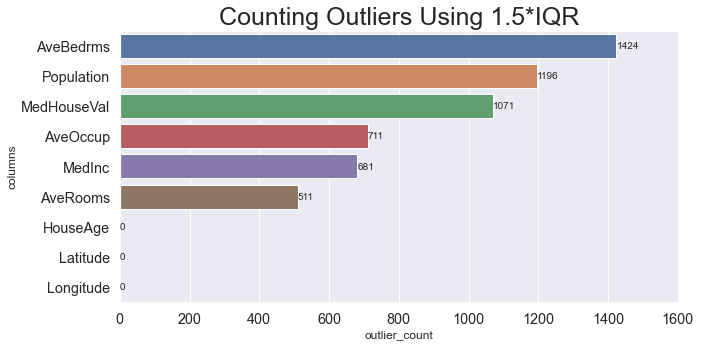

In [16]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=out_iqr_tab, x='outlier_count', y='columns', orient='h')
ax.bar_label(ax.containers[0])
ax.set_xlim([0,1600])
ax.set_title('Counting Outliers Using 1.5*IQR', fontsize=25)

In [17]:
tot_all_out_iqr = out_iqr_tab['outlier_count'].sum()
print(f"So Total Outliers when using IQR rule is {tot_all_out_iqr}")

So Total Outliers when using IQR rule is 5594


**Detection Using zscore. We take 3 std, which are 99.7% of data.**

In [18]:
from scipy.stats import zscore

In [19]:
zscore_list = []
for i in df.columns:
    tot_zscore = (zscore(df[i])>3).sum()
    zscore_list.append(tot_zscore)
zscore_tab = pd.DataFrame(list(zip(df.columns,zscore_list)), columns=['column','zscore_count'])
zscore_tab = zscore_tab.sort_values('zscore_count', ascending=False)

In [48]:
df.head(5)

,team,points,assists
A,A,5,11
B,A,7,8
C,A,7,10
D,A,9,6
E,B,12,6


In [46]:
print("Index:", df.index)

Index: Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'], dtype='object')


In [53]:
print(df.index.names)

[None]


Text(0.5, 1.0, 'Counting Outliers Using zscore')

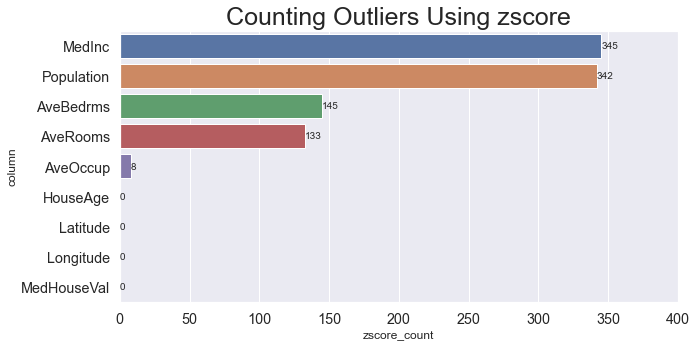

In [20]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(data = zscore_tab, x = 'zscore_count', y='column', orient = 'h')
ax.bar_label(ax.containers[0])
ax.set_xlim([0,400])
ax.set_title('Counting Outliers Using zscore', fontsize=25)

In [21]:
tot_all_out_zscore = zscore_tab['zscore_count'].sum()
print(f"So Total Outliers when using zscore is {tot_all_out_zscore}")

So Total Outliers when using zscore is 973


**Summarize** : Filtering Outliers with IQR rule and zscore is very different methode, so the result is IQR detect more outliers than using zscore. The choice is depend on how much we have the data.

# ) Find duplicate data

In [22]:
df[df.duplicated()]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal


In [23]:
df.duplicated(keep=False).sum()

0

**Summarize** = In short we didn't see any duplicated data

# ) Pandas Profiling

In [24]:
#import pandas_profiling

In [25]:
#descriptive statistics
#pandas_profiling.ProfileReport(df)

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
order_df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/order.csv")


In [27]:
order_df.sample(5)

,order_id,quantity,product_id,price,seller_id,freight_value,customer_id,order_status,purchase_date,payment_type,product_category_name,product_weight_gram
41579,17697f8b42c55a20565782a3b9c1a595,1,f484aa505452986f295eb1205a44debd,4341000,7e93a43ef30c4f03f38b393420bc753a,130000,d2f186ceb055fd3674aa324ef1e43fcc,delivered,2017-11-23,credit card,fashion,700.0
46859,53183a96aacc31f11503c049f49905a3,1,4c2394abfbac7ff59ec7a420918562fa,264000,cc419e0650a3c5ba77189a1882b7556a,78000,67260c60edf9d4c22831ad47718a0e5e,delivered,2017-12-04,debit card,electronics,600.0
10500,44558a1547e448b41c48c4087fe32ddd,1,7ac6cda1ec564b21b2daa9dc0973c1df,495000,de23c3b98a88888289c6f5cc1209054a,63000,40e2a5bab2a362999505842bbfb0d590,delivered,2017-05-11,debit card,toys,501.0
25752,c96b35cd51435c8c1e70c89a5ad976b3,1,06ce9c3e61c7a07f872f8317a7dc534d,1777000,2089a6d640999f9b9141ac719b2af596,139000,eb6c2016db590aefde406e79651a4e8d,delivered,2017-08-25,virtual account,utilities,100.0
1541,165bda414fc1fd79eb721e1938ff198a,1,e2b9252181ddde232e0bfb68df262610,3682000,e24fc9fcd865784fb25705606fe3dfe7,54000,bcaa16104985fc83035709fefa708f14,delivered,2017-02-04,debit card,gadget,1600.0


In [28]:
# Median price yang dibayar customer dari masing-masing metode pembayaran. 
median_price = order_df["price"].groupby(order_df["payment_type"]).median()
print(median_price)


payment_type
credit card        2587500.0
debit card         2621500.0
e-wallet           2589000.0
virtual account    2643000.0
Name: price, dtype: float64


In [29]:
# Ubah freight_value menjadi shipping_cost dan cari shipping_cost 
# termahal dari data penjualan tersebut menggunakan sort.
order_df.rename(columns={"freight_value": "shipping_cost"}, inplace=True)
sort_value = order_df.sort_values(by="price", ascending=0)
print(sort_value)


                               order_id  quantity  \
37085  d7b2d3b902441cf3dd12cd125533217d         1   
41958  2711089c7fec59d4dc8483e3c6a12fa3         1   
3976   f343624eab419250ad81f1ce6be22c93         1   
21072  c8947a583ab9791a5a9d02384cb84302         1   
47074  f6134169ca6f0cdfbe6458ebb5731613         1   
...                                 ...       ...   
33786  0d9e86e02c1a823b20c03ea29d616607         1   
42166  54220fcc516cabe9ec84b210c0765ef2         1   
31745  59a19c83ff825948739dd1601cc107b6         1   
42452  9960ee97c2f8d801a200a01893b3942f         1   
11939  64619901c45fba79638d666058bf6be6         1   

                             product_id    price  \
37085  35afc973633aaeb6b877ff57b2793310  5000000   
41958  7c1bd920dbdf22470b68bde975dd3ccf  5000000   
3976   777d2e438a1b645f3aec9bd57e92672c  5000000   
21072  f8cfb63e323be2e1c4172f255d61843d  5000000   
47074  2ea92fab7565c4fe9f91a5e4e1756258  5000000   
...                                 ...      ...   

In [30]:
# Untuk product_category_name, berapa  rata-rata weight produk tersebut 
# dan standar deviasi mana yang terkecil dari weight tersebut, 
mean_value = order_df["product_weight_gram"].groupby(order_df["product_category_name"]).mean()
print(mean_value.sort_values())
std_value = order_df["product_weight_gram"].groupby(order_df["product_category_name"]).std()
print(std_value.sort_values())


product_category_name
beauty         2120.088396
automotive     2129.559039
electronics    2144.751191
toys           2203.863643
gadget         2229.632942
fashion        2246.516901
sports         2251.879909
utilities      2291.029868
Name: product_weight_gram, dtype: float64
product_category_name
automotive     3799.884166
beauty         3837.474929
electronics    3839.271768
fashion        3858.885213
gadget         3955.792741
toys           3956.814749
sports         4032.850044
utilities      4150.509909
Name: product_weight_gram, dtype: float64


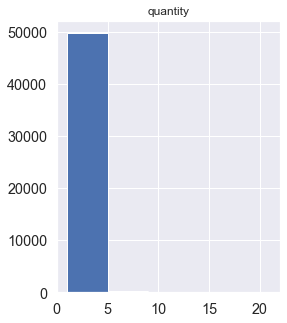

In [31]:
# Buat histogram quantity penjualan dari dataset tersebutuntuk melihat persebaran quantity 
# penjualan tersebut dengan bins = 5 dan figsize= (4,5)
order_df[["quantity"]].hist(figsize=(4, 5), bins=5)
plt.show()

In [32]:
df = pd.DataFrame({'team': ['A', 'A', 'A', 'A', 'B', 'B', 'B', 'B'],
                   'points': [5, 7, 7, 9, 12, 9, 9, 4],
                   'assists': [11, 8, 10, 6, 6, 5, 9, 12]},
                   index=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'])

#view DataFrame
df

,team,points,assists
A,A,5,11
B,A,7,8
C,A,7,10
D,A,9,6
E,B,12,6
F,B,9,5
G,B,9,9
H,B,4,12


In [33]:
df.iloc[0:2,2]

A    11
B     8
Name: assists, dtype: int64

In [34]:
df.loc['E':,:'assits']

,team,points
E,B,12
F,B,9
G,B,9
H,B,4


In [57]:
import pandas as pd
# Baca file sample_tsv.tsv untuk 10 baris pertama saja
df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/sample_tsv.tsv', sep='\t', nrows=10)
# Cetak data frame awal
print("Dataframe awal:\n", df.index.name)
# Set index baru
df_x = ["Pesanan ke-" + str(i) for i in range(0, 10)]
# Cetak data frame dengan index baru
print("Dataframe dengan index baru:\n", df_x.index)

Dataframe awal:
 RangeIndex(start=0, stop=10, step=1)
Dataframe dengan index baru:
 <built-in method index of list object at 0x7fae73bcd5c0>


In [60]:
print("Dataframe awal:\n", df.index)

Dataframe awal:
 RangeIndex(start=0, stop=10, step=1)


In [66]:
print("Index:", df.index)

Index: RangeIndex(start=0, stop=10, step=1)


In [63]:
df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/sample_tsv.tsv', sep='\t', nrows=10)

In [67]:
df.index

RangeIndex(start=0, stop=10, step=1)